# CLUSTER

Cluster analysis is a multivariate statistical technique that groups observations on the basis some of their features or variables that they are described by. The goal of clustering is to maximize the similarity of observations within a cluster and maximize the dissimilarity between clusters. The most intuitive way to measure the distance between them is by drawing a straight line from one to the other. That’s also known as Euclidean distance.

Cluster Analysis : 
- Explore data
- identify pattern

### K-means clustering

1. Choose number of clusters : Number – K, chosen by the person performing the clustering.
2. Specify the number of seeds : A seed is a starting centroid (can be chosen at random, with an algorithm or according to some prior knowledge).
3. Assign each point to a centroid : Based on proximity (measured by Euclidian distance).
4. Adjust the centroids : Repeat 2. and 3. until there is you can no longer find a better clustering solution

## Import the relevant libraries

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set the styles to Seaborn
sns.set()

# Import the KMeans module so we can perform k-means clustering with sklearn
from sklearn.cluster import KMeans

## Load the data

In [115]:
# Load the country clusters data
data = pd.read_csv('3.01. Country clusters.csv')

In [116]:
# Check out the data manually 
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


The dataset contains the following columns: Country, Latitude, Longitude, and Language. We will proceed with the cluster analysis based on the Latitude and Longitude values.

In [118]:
data['Longitude'].min()

-103.77

## Plot the data

<function matplotlib.pyplot.show(close=None, block=None)>

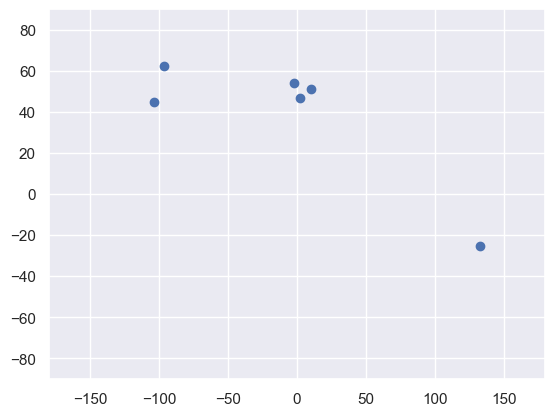

In [120]:
# Use the simplest code possible to create a scatter plot using the longitude and latitude
# Note that in order to reach a result resembling the world map, we must use the longitude as y, and the latitude as x
plt.scatter(data['Longitude'],data['Latitude'])
# Set limits of the axes, again to resemble the world map
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show

## Select the features

In [122]:
# iloc is a method used to 'slice' data 
# 'slice' is not technically correct as there are methods 'slice' which are a bit different
# The term used by pandas is 'selection by position'
# The first argument of identifies the rows we want to keep
# The second - the columns
# When choosing the columns, e.g. a:b, we will keep columns a,a+1,a+2,...,b-1 ; so column b is excluded
x = data.iloc[:,1:3]
# for this particular case, we are choosing columns 1 and 2
# Note column indices in Python start from 0

In [123]:
# Check if we worked correctly
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


## Clustering

In [125]:
# Create an object (which we would call kmeans)
# The number in the brackets is K, or the number of clusters we are aiming for
kmeans = KMeans(3)

In [126]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")

In [127]:
# Fit the input data, i.e. cluster the data in X in K clusters
kmeans.fit(x)

KMeans(n_clusters=3)

## Clustering results

There are many ways to do this part, we found this to be the most illustrative one.

In [130]:
# Create a variable which will contain the predicted clusters for each observation
identified_clusters = kmeans.fit_predict(x)
# Check the result
identified_clusters

array([2, 2, 0, 0, 0, 1], dtype=int32)

We can obtain the predicted clusters for each observation using the fit predict method.

In [132]:
# Create a copy of the data
data_with_clusters = data.copy()
# Create a new Series, containing the identified cluster for each observation
data_with_clusters['Cluster'] = identified_clusters
# Check the result
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-96.80,English,2
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


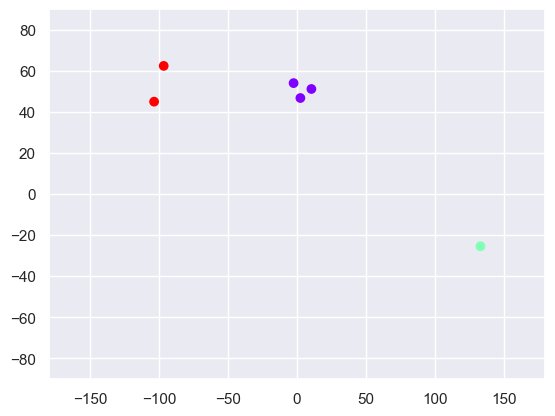

In [133]:
# Plot the data using the longitude and the latitude
# c (color) is an argument which could be coded with a variable 
# The variable in this case has values 0,1,2, indicating to plt.scatter, that there are three colors (0,1,2)
# All points in cluster 0 will be the same colour, all points in cluster 1 - another one, etc.
# cmap is the color map. Rainbow is a nice one, but you can check others here: https://matplotlib.org/users/colormaps.html
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

## Cluster for categorical data

#### Map the data

To perform clustering based on language, we need to convert the categorical language data into numerical format. One common approach is to use one-hot encoding. After encoding the language data, we can apply clustering to the encoded data.

Let's start by applying one-hot encoding to the Language column and then perform clustering.

In [137]:
# Create a copy of the original dataset
data_mapped = data.copy()
# Map languages with 0, 1, and 2. Note that this is not the best way to do that, but for now we will use it 
data_mapped['Language']=data_mapped['Language'].map({'English':0,'French':1,'German':2})
# Check if we did it correctly
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


## Select the features

In [139]:
# iloc is a method used to 'slice' data 
# 'slice' is not technically correct as there are methods 'slice' which are a bit different
# The term used by pandas is 'selection by position'
# The first argument of identifies the rows we want to keep
# The second - the columns
# When choosing the columns, e.g. a:b, we will keep columns a,a+1,a+2,...,b-1 ; so column b is excluded
x = data_mapped.iloc[:,1:4]
# for this particular case, we are choosing columns 1 and 2
# Note column indices in Python start from 0

In [140]:
# Check if we worked correctly
x

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


## Clustering

In [203]:
# Perform K-Means clustering with 2 clusters
#kmeans_language = KMeans(n_clusters=2, random_state=0)
#data_mapped['Language_Cluster'] = kmeans_language.fit_predict(x)
#data_mapped
# Display the results
#data_mapped[['Country', 'Language', 'Language_Cluster']]

,Country,Latitude,Longitude,Language,Language_Cluster
0,USA,44.97,-103.77,0,0
1,Canada,62.40,-96.80,0,0
2,France,46.75,2.40,1,0
3,UK,54.01,-2.53,0,0
4,Germany,51.15,10.40,2,0
5,Australia,-25.45,133.11,0,1


In [142]:
# Create an object (which we would call kmeans)
# The number in the brackets is K, or the number of clusters we are aiming for
kmeans = KMeans(2)

In [143]:
# Fit the input data, i.e. cluster the data in X in K clusters
kmeans.fit(x)

KMeans(n_clusters=2)

## Clustering results

In [145]:
# Create a variable which will contain the predicted clusters for each observation
identified_clusters = kmeans.fit_predict(x)
# Check the result
identified_clusters

array([0, 0, 0, 0, 0, 1], dtype=int32)

In [146]:
# Create a copy of the mapped data
data_with_clusters = data_mapped.copy()
# Create a new Series, containing the identified cluster for each observation
data_with_clusters['Cluster'] = identified_clusters
# Check the result
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,0,0
1,Canada,62.40,-96.80,0,0
2,France,46.75,2.40,1,0
3,UK,54.01,-2.53,0,0
4,Germany,51.15,10.40,2,0
5,Australia,-25.45,133.11,0,1


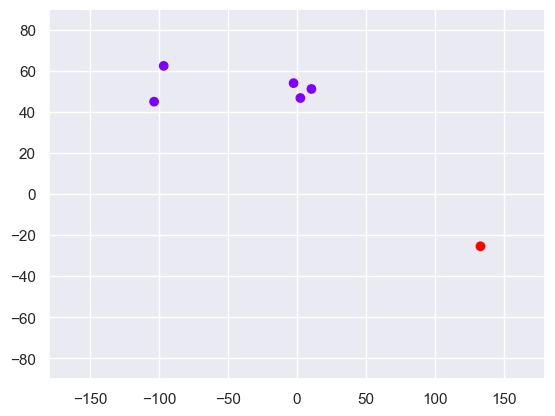

In [147]:
# Plot the data using the longitude and the latitude
# c (color) is an argument which could be coded with a variable 
# The variable in this case has values 0,1,2, indicating to plt.scatter, that there are three colors (0,1,2)
# All points in cluster 0 will be the same colour, all points in cluster 1 - another one, etc.
# cmap is the color map. Rainbow is a nice one, but you can check others here: https://matplotlib.org/users/colormaps.html
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

The countries are grouped into two language clusters. The clustering has grouped English-speaking countries (USA, Canada, and UK) into one cluster (Cluster 1) and French-speaking and German-speaking countries (France and Germany) into another cluster (Cluster 0).

## Selecting the number of clusters

### WCSS (within-cluster sum of squares)
WCSS is a measure developed within the ANOVA framework. It gives a very good idea about the different distance between different clusters and within clusters, thus providing us a rule for deciding the appropriate number of clusters.

WCSS (Within-Cluster Sum of Squares) is a measure used in clustering algorithms like K-Means to evaluate the compactness of clusters. It calculates the sum of the squared distances between each point in a cluster and the centroid of that cluster. The goal is to minimize WCSS to ensure that data points within the same cluster are as close to each other as possible.

Use the ingerated <i>sklearn</i> method <i> 'inertia_' </i>.

In [152]:
# Get the WCSS for the current solution
kmeans.inertia_

13208.958119999996

In [153]:
# Create an empty list
wcss=[]

# Create all possible cluster solutions with a loop
for i in range(1,7):
    # Cluster solution with i clusters
    kmeans = KMeans(i)
    # Fit the data
    kmeans.fit(x)
    # Find WCSS for the current iteration
    wcss_iter = kmeans.inertia_
    # Append the value to the WCSS list
    wcss.append(wcss_iter)

In [154]:
# Let's see what we got
wcss

[42605.41356666667,
 13208.958119999996,
 290.1052333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

Elbow Method:

WCSS is plotted against the number of clusters to determine the optimal number of clusters. The point where the rate of decrease sharply slows down (forming an "elbow") is considered the optimal number of clusters. This indicates a balance between having a low WCSS and a reasonable number of clusters.

### The Elbow Method

Text(0, 0.5, 'Within-cluster Sum of Squares')

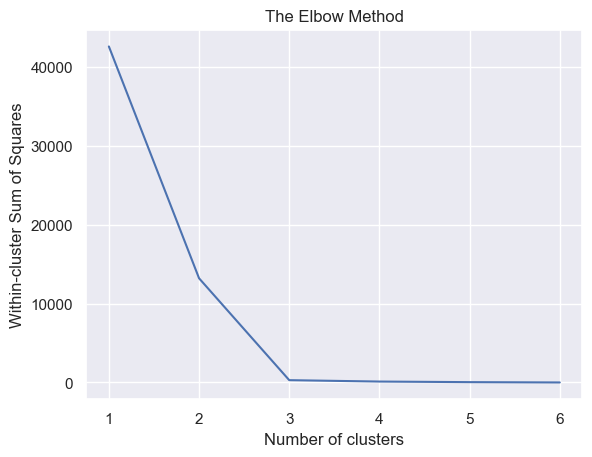

In [157]:
# Create a variable containing the numbers from 1 to 6, so we can use it as X axis of the future plot
number_clusters = range(1,7)
# Plot the number of clusters vs WCSS
plt.plot(number_clusters,wcss)
# Name your graph
plt.title('The Elbow Method')
# Name the x-axis
plt.xlabel('Number of clusters')
# Name the y-axis
plt.ylabel('Within-cluster Sum of Squares')

The elbow method suggests that the optimal number of clusters might be 3, as the curve starts to bend around that point.